In [42]:
import pandas as pd

from pandas import DataFrame, TimeSeries

import numpy as np

%matplotlib inline

In [12]:
df = pd.read_excel("zg-averages-data.xlsx")
df.tail()

,year,mon,avg
547,1996,8,20.7
548,1996,9,14.1
549,1996,10,12.2
550,1996,11,8.3
551,1996,12,-0.9


In [7]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df["year"].tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [22]:
df.year.tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [32]:
df1 = df[df.year < 1980]
df2 = df1[ df1.year>=1970]

Zadatak 1

Ispišite sve retke za koje vrijedi da je prosječna temperatura bila negativna

In [33]:
df2[ df2.avg > 0]

,year,mon,avg
229,1970,2,1.1
230,1970,3,4.8
231,1970,4,9.5
232,1970,5,13.1
233,1970,6,19.6
234,1970,7,19.7
235,1970,8,20.0
236,1970,9,15.6
237,1970,10,9.8
238,1970,11,8.3


Nacrtajmo graf kretanja temperatura za 1994. godinu

In [45]:
yr1994 = df[df.year == 1994].avg

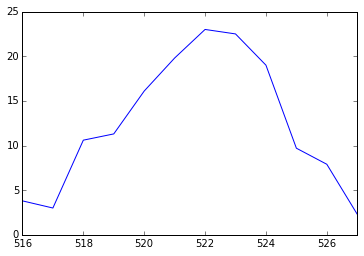

In [46]:
yr1994.plot()

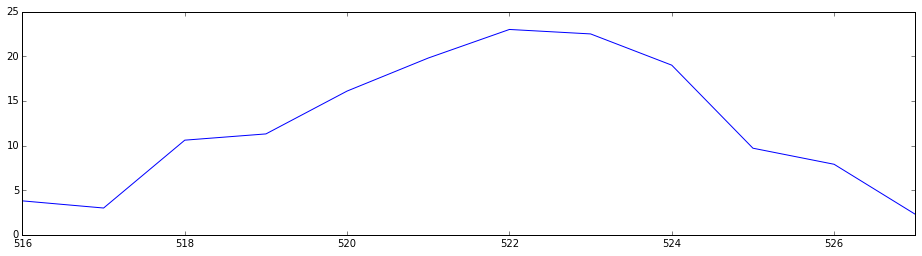

In [47]:
yr1994 = df[df.year == 1994].avg
yr1994.plot(figsize=(16,4))

** Zadatak 3 **

Izračunajmo prosjeke temperatura po mjesecima

Npr. prosječna temperatura u siječnju, itd.

In [82]:
np.mean(df[df.mon == 1].avg)


for i in range(1,13):
    sjec = df[df.mon == i].avg
    print (sjec.mean())
[np.mean(df[df.mon == i].avg) for i in range(1,13)]

-0.315217391304
1.70217391304
6.09130434783
10.6913043478
15.2630434783
18.7
20.4369565217
19.8826086957
16.2108695652
10.8456521739
5.48913043478
1.19130434783


[-0.31521739130434789,
 1.7021739130434781,
 6.091304347826088,
 10.691304347826087,
 15.263043478260871,
 18.699999999999999,
 20.43695652173913,
 19.882608695652173,
 16.210869565217394,
 10.845652173913043,
 5.4891304347826084,
 1.191304347826087]

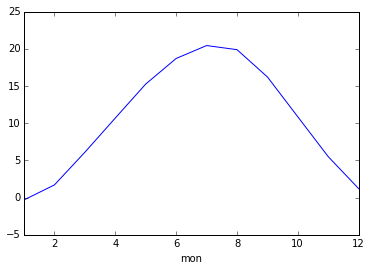

In [86]:
df.groupby("mon").aggregate(np.mean).avg.plot()

** Zadatak **

Izračunati korelaciju

In [96]:
df.corr()

,year,mon,avg
year,1.000000,0.000000,0.028486
mon,0.000000,1.000000,0.204373
avg,0.028486,0.204373,1.000000


In [97]:
df[["mon","avg"]].corr()

,mon,avg
mon,1.000000,0.204373
avg,0.204373,1.000000


** Zadatak **

Izračunati korelaciju između broja mjesecea i prosječne mjesečne temperature za prvu i posebno za drugu polovicu godine

In [113]:
sf = df[["mon", "avg"]]
sf1 = sf[sf.mon<=6]
sf2 = sf[sf.mon > 6]

In [111]:
sf1.corr()

,mon,avg
mon,1.000000,-0.959003
avg,-0.959003,1.000000


In [114]:
sf2.corr()

,mon,avg
mon,1.000000,-0.959003
avg,-0.959003,1.000000


** Zadatak **

U stupac '''d.odst''' upisati odstupanje od prosjeka

npr. koliko siječanj 1951. odstupa od prosjeka(svih siječnjeva)

In [115]:
df.head()

,year,mon,avg
0,1951,1,2.9
1,1951,2,5.0
2,1951,3,6.2
3,1951,4,11.1
4,1951,5,15.6


In [137]:
prosjeci = df.groupby("mon").aggregate(np.mean).avg.values

def f_odst(m, a):
    return (a-prosjeci[m-1])

In [138]:
f_odst(m=1, a=2.9)

3.215217391304348

In [139]:
df.odst = f_odst(m = df.mon, a= df.avg)

In [141]:
df.head()

,year,mon,avg,odst
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [142]:
df["novi_stupac"] = 0

In [143]:
df.head()

,year,mon,avg,odst,novi_stupac
0,1951,1,2.9,3.215217,0
1,1951,2,5.0,3.297826,0
2,1951,3,6.2,0.108696,0
3,1951,4,11.1,0.408696,0
4,1951,5,15.6,0.336957,0


In [147]:
del df["novi_stupac"]

In [148]:
df.head()

,year,mon,avg,odst
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


** Zadatak ** 

Preimenovati stupce DataFrame objekta

In [150]:
df.columns = ["YEAR", "MON", "AVG", "ODST"]

In [151]:
df.head()

,YEAR,MON,AVG,ODST
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [158]:
nvec = np.arange(1,100)

In [160]:
def f(x):
    return x+2

In [161]:
b = f(nvec)
b

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [163]:
fv = np.vectorize(f)

In [164]:
fv(nvec)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [165]:
df["Novi"] = 0

In [166]:
df.head()

,YEAR,MON,AVG,ODST,Novi
0,1951,1,2.9,3.215217,0
1,1951,2,5.0,3.297826,0
2,1951,3,6.2,0.108696,0
3,1951,4,11.1,0.408696,0
4,1951,5,15.6,0.336957,0


** Zadatak **
Napraviti novi stupac u koji ćete spremiti prosječnu temo u Fahrenheitima

In [169]:
df.Novi = df.AVG * 9/5 + 32

In [170]:
df.head()

,YEAR,MON,AVG,ODST,Novi
0,1951,1,2.9,3.215217,37.22
1,1951,2,5.0,3.297826,41.00
2,1951,3,6.2,0.108696,43.16
3,1951,4,11.1,0.408696,51.98
4,1951,5,15.6,0.336957,60.08


** Zadatak **

Napravite još jednom
'''bash
git add *.ipynb
'''
(potrebno je dodati i ovaj pandas notebook).

''bash
git commit -a -m

In [184]:
df[df.MON == 1].AVG.min(), df[df.MON == 7].AVG.max()

(-7.0, 23.0)

In [194]:
df.groupby("MON").aggregate(max).ABS_ODST

MON
1     6.684783
2     9.902174
3     4.508696
4     3.408696
5     3.936957
6     2.300000
7     2.563043
8     4.617391
9     3.389130
10    3.845652
11    4.710870
12    4.791304
Name: ABS_ODST, dtype: float64

In [193]:
df["ABS_ODST"] = np.abs(df.ODST)
df.head()

,YEAR,MON,AVG,ODST,Novi,ABS_ODST
0,1951,1,2.9,3.215217,37.22,3.215217
1,1951,2,5.0,3.297826,41.00,3.297826
2,1951,3,6.2,0.108696,43.16,0.108696
3,1951,4,11.1,0.408696,51.98,0.408696
4,1951,5,15.6,0.336957,60.08,0.336957
